Primero que nada, abrimos el dataset con pandas, para poder tener un primer pantallazo y empezar a trabajar.

In [1]:
import pandas as pd

In [2]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_2021_1_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_2021_1_GID))

In [3]:
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


Usando la herramienta de pandas profiling, podemos ver un análisis completo de los datos, útil para una primera observación.

In [4]:
from pandas_profiling import ProfileReport
report = ProfileReport(
    df, title='FIUFIP datos impositivos', explorative=True, lazy=False
)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/home/sebastian/.local/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

A partir de esta primer observación, podemos plantearnos algunas preguntas entender cómo determinar si una persona es de bajos o altos ingresos: ¿cómo se relacionan los parámetros del dataset con los ingresos de las personas? ¿Hay una correlación entre los ingresos y los años estudiados? ¿Entre los ingresos y la ganancia perdida?, ¿con las horas de trabajo registradas?, ¿con la edad o rol familiar?, ¿con algún otro parámetro?

Para responder estas preguntas, nos sirve el heatmap que provee el pandas profiling en la sección de correlations. Se puede ver que hay una leve correlación entre la cantidad de años estudiados y el alto valor adquisitivo.

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

## ¿Hay barrios habitados mayoritariamente por personas con alto/bajo valor adquisitivo?

<Figure size 1200x825 with 0 Axes>

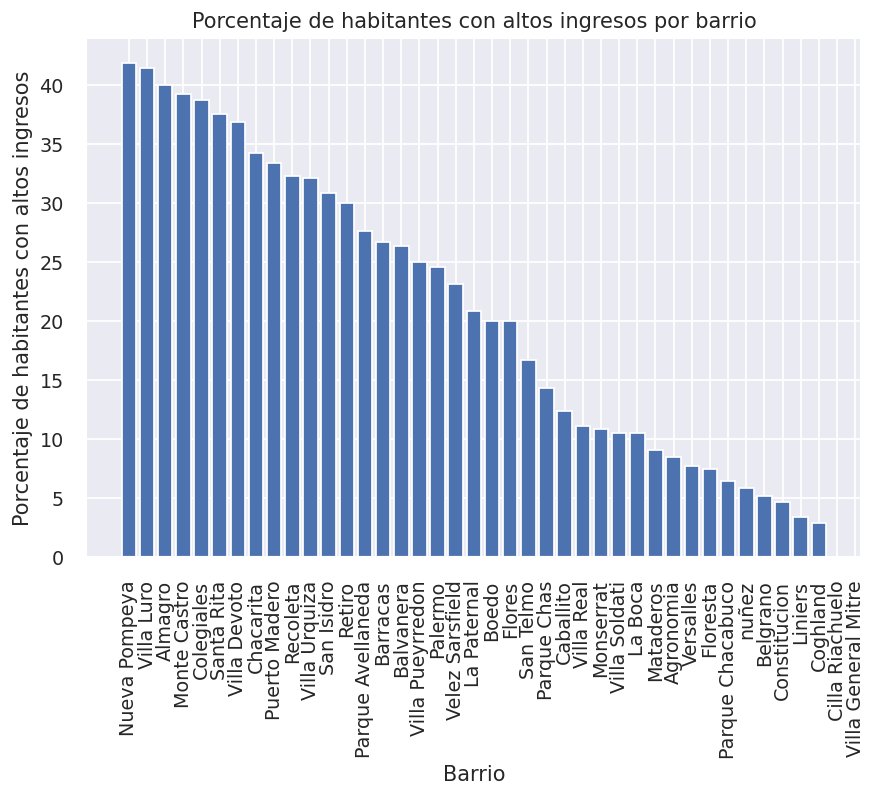

In [38]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['barrio'].value_counts() / df_total['barrio'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100) # plt.bar(y, x) 
plt.ylabel("Porcentaje de habitantes con altos ingresos")
plt.xlabel("Barrio")
plt.title('Porcentaje de habitantes con altos ingresos por barrio')
plt.xticks(rotation=90)
plt.show()

Se observa que en existe un conjunto de barrios en los que menos del %15 de su poblacion es de altos ingresos. (¿podriamos ajustar mas ese limite con menos del %10 desde Mataderos? )

## ¿Hay categorias de trabajo correspondientes mayoritariamente a personas con bajo valor adquisitivo?

<Figure size 1200x825 with 0 Axes>

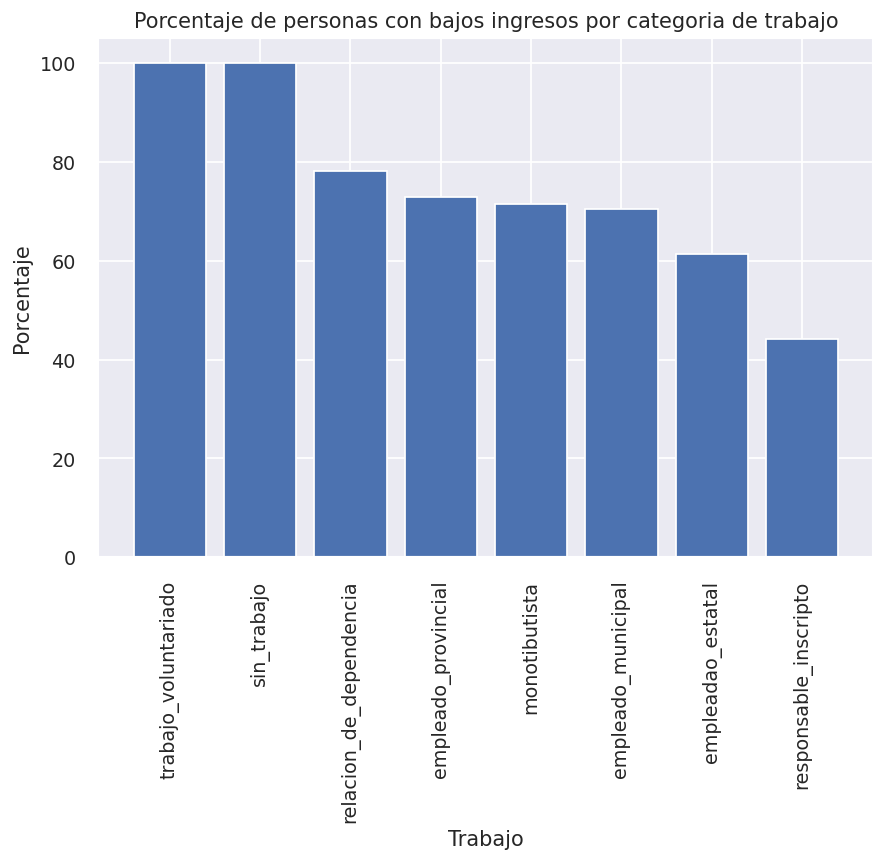

In [58]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 0]

df_r = (df_filtrado['categoria_de_trabajo'].value_counts() / df_total['categoria_de_trabajo'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index, df_r.values*100, ) # plt.bar(y, x) 
plt.ylabel("Porcentaje")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con bajos ingresos por categoria de trabajo")
plt.xticks(rotation=90)
plt.show()

Se observa que categorias como trabajo voluntariado y desempleado son asociadas exclusivamente a personas de bajo poder adquisitivo. 

In [82]:
print("porcentaje de personas con categorias desempleados o voluntariados")
print((df[(df['categoria_de_trabajo'] == 'sin_trabajo') | (df['categoria_de_trabajo'] == 'trabajo_voluntariado')].size ) / df.size) 

porcentaje de personas con categorias desempleados o voluntariados
0.0006449433371210958


sin embargo se observa que el porcentaje de personas con estas categorias son despreciables

<Figure size 1200x825 with 0 Axes>

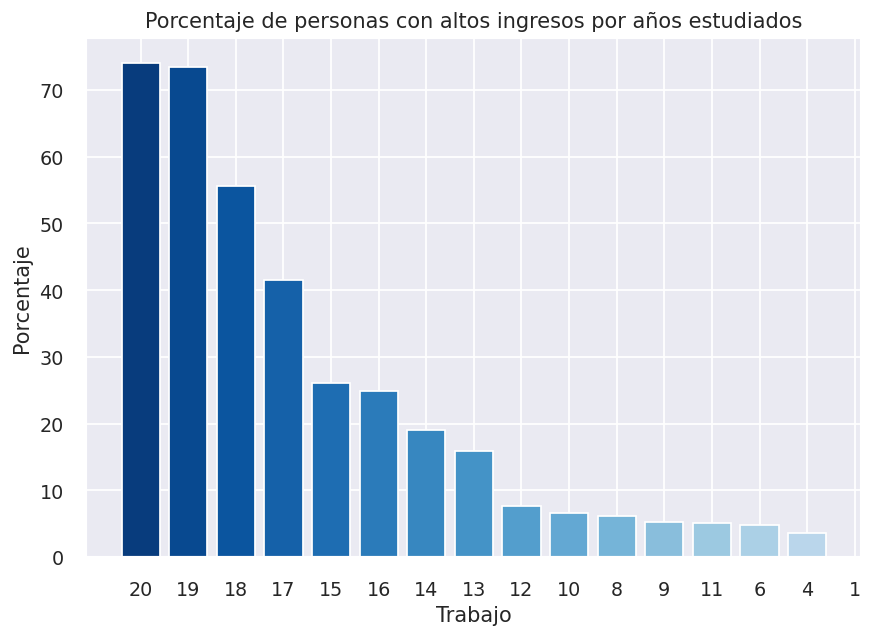

In [78]:
plt.figure(dpi=150)

df_total = df
df_filtrado = df[df['tiene_alto_valor_adquisitivo'] == 1]

df_r = (df_filtrado['anios_estudiados'].value_counts() / df_total['anios_estudiados'].value_counts()).sort_values(ascending=False)

plt.figure(dpi=(125))

plt.bar(df_r.index.map(str), df_r.values*100, color =sns.color_palette('Blues_r', 20))
plt.ylabel("Porcentaje")
plt.xlabel("Trabajo")
plt.title("Porcentaje de personas con altos ingresos por años estudiados")
plt.show()